<a href="https://colab.research.google.com/github/J-Pitts/J-Pitts.github.io/blob/master/CryptoTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycoingecko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from pycoingecko import CoinGeckoAPI
import pandas as pd

In [4]:
cg = CoinGeckoAPI()

In [159]:
coinslist = ['ETHEREUM','POLYGON','CARDANO','BITCOIN','CHAINLINK', 'SOLANA', 'UNISWAP','COSMOS','CRONOS','ALGORAND','DECENTRALAND']


coinprices = cg.get_price(ids = coinslist, vs_currencies = 'usd')

history = cg.get_coin_market_chart_by_id(id = 'bitcoin',vs_currency='usd',days=30,interval='daily')

df = pd.DataFrame(history)

prices = pd.DataFrame(history['prices'], columns=['date', 'prices']).set_index('date')


df['Date'] = pd.to_datetime(prices.index , unit='ms')
df['Date'] = df['Date'].dt.date

df['prices'] = prices.values


for key, value in coinprices.items(): 
    for i in value:
      print('\n'+key.capitalize()+':', '${:.2f}'.format(float(value[i])))


Algorand: $0.23

Bitcoin: $30830.00

Cardano: $0.44

Chainlink: $7.63

Cosmos: $12.04

Cronos: $0.00

Decentraland: $0.63

Ethereum: $2115.56

Solana: $25.17

Uniswap: $6.42


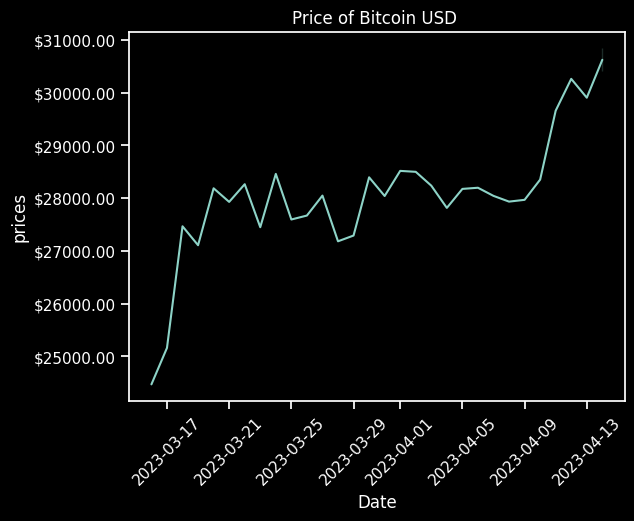

In [160]:
import seaborn as sns
import matplotlib as plt
from matplotlib.ticker import FormatStrFormatter

ax = sns.lineplot(x='Date', y = 'prices', data = df)
ax.set_title(label='Price of Bitcoin USD ')
sns.set(style="ticks")
plt.style.use("dark_background")
ax.tick_params(axis='x', rotation=45)
ax.yaxis.set_major_formatter(FormatStrFormatter('$%.2f'))


